In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
    adjusted_rand_score,
    normalized_mutual_info_score,
)

import csv
import joblib
import json
from pathlib import Path

ARTIFACTS_DIR = Path("artifacts")
ARTIFACTS_DIR.mkdir(parents=True, exist_ok=True)

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("Artifacts dir:", ARTIFACTS_DIR.resolve())

Artifacts dir: D:\aie\aie-student-lnv\homeworks\HW07\artifacts


# Загрузка данных и первичный анализ

## Загрузка csv и фиксация минимума

### Первый датасет

In [2]:
file1 = "data/S07-hw-dataset-01.csv"
data1 = pd.read_csv(file1, sep=",")

In [3]:
data1.head(10)

,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
0,0,-0.536647,-69.812900,-0.002657,71.743147,-11.396498,-12.291287,-6.836847,-0.504094
1,1,15.230731,52.727216,-1.273634,-104.123302,11.589643,34.316967,-49.468873,0.390356
2,2,18.542693,77.317150,-1.321686,-111.946636,10.254346,25.892951,44.595250,0.325893
3,3,-12.538905,-41.709458,0.146474,16.322124,1.391137,2.014316,-39.930582,0.139297
4,4,-6.903056,61.833444,-0.022466,-42.631335,3.107154,-5.471054,7.001149,0.131213
5,5,-9.155108,80.803958,-0.023064,-42.562391,2.681999,-10.450216,52.285727,0.134157
6,6,-13.414198,-45.224459,0.016343,23.198649,0.275342,4.845267,40.734814,0.040547
7,7,-15.303931,-39.539061,0.198038,21.117504,0.334350,1.308574,17.347164,0.378773
8,8,-15.154668,-34.099503,0.215049,18.059247,1.937555,2.834771,-87.429349,-0.191803
9,9,0.673476,-82.966506,-0.066941,70.082996,-11.262309,-7.221289,-28.222359,-0.383327


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  12000 non-null  int64  
 1   f01        12000 non-null  float64
 2   f02        12000 non-null  float64
 3   f03        12000 non-null  float64
 4   f04        12000 non-null  float64
 5   f05        12000 non-null  float64
 6   f06        12000 non-null  float64
 7   f07        12000 non-null  float64
 8   f08        12000 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB


В первом датасете пропусков нет

In [5]:
data1.describe()

,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,5999.50000,-2.424716,19.107804,-0.222063,-8.284501,-0.190717,0.962972,0.033724,0.007638
std,3464.24595,11.014315,60.790338,0.500630,59.269838,7.026435,14.794713,59.541782,0.607053
min,0.00000,-19.912573,-92.892652,-1.590979,-134.303679,-11.869169,-20.521164,-215.098834,-2.633469
25%,2999.75000,-9.472623,-40.282955,-0.125145,-48.345007,-5.132473,-8.807706,-39.900520,-0.401483
50%,5999.50000,-6.869404,54.069335,-0.031753,16.211728,0.444730,-6.134169,-0.578494,0.005306
75%,8999.25000,0.523841,70.280739,0.054980,28.067178,3.942368,2.334426,39.719821,0.410132
max,11999.00000,24.403381,112.229523,0.512277,75.088604,13.717091,41.452857,213.381767,2.490745


### Второй датасет

In [6]:
file2 = "data/S07-hw-dataset-02.csv"
data2 = pd.read_csv(file2, sep=",")

In [7]:
data2.head(10)

,sample_id,x1,x2,z_noise
0,0,0.098849,-1.846034,21.288122
1,1,-1.024516,1.829616,6.072952
2,2,-1.094178,-0.158545,-18.938342
3,3,-1.612808,-1.565844,-11.629462
4,4,1.659901,-2.133292,1.895472
5,5,-0.932356,2.894645,-9.150930
6,6,0.117411,0.834173,4.382666
7,7,1.024343,-1.421237,-3.629838
8,8,-0.468618,-0.296113,-9.568211
9,9,-1.231242,-1.213089,-7.716715


In [8]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  8000 non-null   int64  
 1   x1         8000 non-null   float64
 2   x2         8000 non-null   float64
 3   z_noise    8000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 250.1 KB


Во втором датасете пропусков нет

In [9]:
data2.describe()

,sample_id,x1,x2,z_noise
count,8000.00000,8000.000000,8000.000000,8000.000000
mean,3999.50000,0.478867,0.241112,0.110454
std,2309.54541,0.955138,0.663195,8.097716
min,0.00000,-2.487352,-2.499237,-34.056074
25%,1999.75000,-0.116516,-0.242357,-5.392210
50%,3999.50000,0.490658,0.241092,0.132470
75%,5999.25000,1.085263,0.726526,5.655605
max,7999.00000,2.987555,2.995553,29.460076


### Третий датасет

In [10]:
file3 = "data/S07-hw-dataset-03.csv"
data3 = pd.read_csv(file3, sep=",")

In [11]:
data3.head(10)

,sample_id,x1,x2,f_corr,f_noise
0,0,-2.710470,4.997107,-1.015703,0.718508
1,1,8.730238,-8.787416,3.953063,-1.105349
2,2,-1.079600,-2.558708,0.976628,-3.605776
3,3,6.854042,1.560181,1.760614,-1.230946
4,4,9.963812,-8.869921,2.966583,0.915899
5,5,-3.742328,1.064578,-0.286082,-0.284744
6,6,-5.610292,9.366270,-2.713613,-0.129379
7,7,3.875465,2.140182,0.722438,-0.269551
8,8,-7.267612,5.822122,-2.962351,-1.237094
9,9,9.415678,6.038169,3.124603,-0.140653


In [12]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  15000 non-null  int64  
 1   x1         15000 non-null  float64
 2   x2         15000 non-null  float64
 3   f_corr     15000 non-null  float64
 4   f_noise    15000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 586.1 KB


В третьем датасете пропусков нет

In [13]:
data3.describe()

,sample_id,x1,x2,f_corr,f_noise
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,1.246296,1.033764,0.212776,-0.027067
std,4330.271354,4.592421,4.710791,1.530017,2.506375
min,0.000000,-9.995585,-9.980853,-5.212038,-8.785884
25%,3749.750000,-1.782144,-2.666393,-0.966224,-1.731128
50%,7499.500000,0.664226,1.831257,0.296508,-0.052391
75%,11249.250000,4.435671,4.969630,1.390273,1.673831
max,14999.000000,16.207863,14.271153,5.795876,11.266865


### Четвёртый датасет

In [14]:
file4 = "data/S07-hw-dataset-04.csv"
data4 = pd.read_csv(file4, sep=",")

In [15]:
data4.head(10)

,sample_id,cat_a,cat_b,n01,n02,n03,n04,n05,n06,n07,...,n21,n22,n23,n24,n25,n26,n27,n28,n29,n30
0,0,B,X,-4.827501,-24.507466,-7.852963,0.771781,28.297884,-4.493911,-42.769449,...,24.597176,-26.354320,4.543397,-19.549036,-3.051332,-5.538587,-3.084457,5.499629,-6.128896,3.132067
1,1,F,V,51.302500,NaN,5.534737,51.305464,-8.027553,28.297548,NaN,...,-18.216260,8.527932,17.202115,-30.452260,0.855326,1.199066,3.597555,-2.239703,2.932710,0.473145
2,2,A,W,-4.820828,-2.625385,27.891578,1.523041,-5.776687,-16.298523,2.462937,...,-48.260775,9.313232,12.323411,55.081325,-3.945606,-0.280540,-0.130583,-7.353205,-2.942836,1.460477
3,3,B,X,-2.627573,-25.063639,-9.450011,-8.344669,22.371118,-11.525848,-43.762607,...,24.700663,-25.466915,-3.398665,-18.174541,0.438229,3.152556,3.859283,-2.678769,-2.213923,-4.724639
4,4,C,Y,-11.415710,-8.692169,48.636163,14.661826,-39.634618,10.769075,40.187536,...,-79.710383,-13.694253,41.575892,-9.498640,1.529608,-1.641347,3.500090,3.111257,1.475232,-1.321676
5,5,C,Y,NaN,-6.568176,48.321294,14.087974,-37.952812,10.285660,38.682861,...,-76.537851,-10.745350,40.930772,-7.135282,3.277449,-0.007331,0.720048,-5.804991,1.136804,0.129350
6,6,F,Y,-11.494178,-5.632114,49.332532,13.675489,-39.221865,11.170254,42.317318,...,-77.382721,-10.612934,39.408249,-7.439799,-0.346658,-1.760743,-4.634182,-0.180436,-6.503820,-0.701660
7,7,E,U,29.509838,34.898300,-22.253684,0.598944,21.346214,11.371536,-13.184219,...,20.362487,15.401255,-17.545954,19.334069,-1.704104,3.928554,5.608148,-4.573262,2.345244,-2.008675
8,8,F,V,56.366753,-2.791186,1.264317,45.268076,-0.066137,31.755385,12.780097,...,-4.186373,10.040766,18.300005,-34.899137,-1.436598,-1.489694,3.887254,-0.356854,1.255438,-5.024669
9,9,A,W,7.475065,2.402914,33.931401,4.647808,NaN,-10.726027,6.825630,...,-39.461697,9.905740,7.597248,45.097071,-3.448577,-1.675175,-0.006618,2.005015,-1.767238,4.194457


In [16]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  10000 non-null  int64  
 1   cat_a      10000 non-null  object 
 2   cat_b      10000 non-null  object 
 3   n01        9826 non-null   float64
 4   n02        9811 non-null   float64
 5   n03        9801 non-null   float64
 6   n04        9808 non-null   float64
 7   n05        9799 non-null   float64
 8   n06        9817 non-null   float64
 9   n07        9796 non-null   float64
 10  n08        9806 non-null   float64
 11  n09        9805 non-null   float64
 12  n10        9811 non-null   float64
 13  n11        9796 non-null   float64
 14  n12        9798 non-null   float64
 15  n13        9803 non-null   float64
 16  n14        9802 non-null   float64
 17  n15        9814 non-null   float64
 18  n16        9809 non-null   float64
 19  n17        9788 non-null   float64
 20  n18    

В четвёртом датасете обнаружены пропуски

In [17]:
data4.describe()

,sample_id,n01,n02,n03,n04,n05,n06,n07,n08,n09,...,n21,n22,n23,n24,n25,n26,n27,n28,n29,n30
count,10000.00000,9826.000000,9811.000000,9801.000000,9808.000000,9799.000000,9817.000000,9796.000000,9806.000000,9805.000000,...,9785.000000,9804.000000,9829.000000,9793.000000,9815.000000,9776.000000,9803.000000,9789.000000,9798.000000,9805.000000
mean,4999.50000,17.348435,-2.057620,7.908302,14.269157,0.900590,5.832787,-0.840875,-4.888128,3.184200,...,-12.716502,-0.506241,8.360226,0.026943,0.039297,-0.037155,0.028512,-0.030738,-0.018685,-0.030254
std,2886.89568,22.578551,19.043410,25.637807,18.815319,20.981294,13.221646,26.583849,15.466271,32.208740,...,37.290305,14.336833,17.754646,26.121335,3.009995,3.020813,3.028106,3.000090,3.014209,3.014573
min,0.00000,-22.437090,-37.546998,-38.136412,-23.374316,-45.914070,-20.650038,-60.297304,-44.464550,-70.904880,...,-89.640783,-35.102360,-25.014050,-49.423300,-11.225848,-14.446922,-10.840777,-11.679259,-11.437909,-11.491223
25%,2499.75000,-3.975438,-14.200552,-8.591513,-1.223379,-5.086756,-4.532057,-13.554720,-17.352641,-11.460490,...,-41.284671,-11.563652,-2.123576,-19.425213,-1.973213,-2.082235,-2.007628,-2.074500,-2.051778,-2.074396
50%,4999.50000,22.042807,-6.532183,0.350400,10.069142,2.413111,7.391953,-2.429024,-7.095546,13.258691,...,-1.145681,2.491416,6.691365,-8.464171,0.037806,-0.033336,0.031588,-0.043127,-0.015441,-0.015903
75%,7499.25000,37.535647,2.092197,30.725630,29.807101,18.398883,13.033076,16.095731,3.909111,20.188426,...,18.916379,11.903004,14.939690,16.861978,2.048648,2.019027,2.056870,1.980217,2.013964,2.031215
max,9999.00000,65.446912,43.326647,60.185729,65.094588,42.527554,39.933274,48.591236,31.335431,64.696045,...,49.157087,22.452135,46.892903,61.540902,11.002135,11.394631,11.936846,10.663960,10.665988,13.755203


Количество пропусков в четвёртом датасете

In [18]:
total4 = data4.isna().sum()
total4

sample_id      0
cat_a          0
cat_b          0
n01          174
n02          189
n03          199
n04          192
n05          201
n06          183
n07          204
n08          194
n09          195
n10          189
n11          204
n12          202
n13          197
n14          198
n15          186
n16          191
n17          212
n18          212
n19          187
n20          203
n21          215
n22          196
n23          171
n24          207
n25          185
n26          224
n27          197
n28          211
n29          202
n30          195
dtype: int64

Доля пропусков в четвёртом датасете

In [19]:
share4 = total4 / len(data4)
share4

sample_id    0.0000
cat_a        0.0000
cat_b        0.0000
n01          0.0174
n02          0.0189
n03          0.0199
n04          0.0192
n05          0.0201
n06          0.0183
n07          0.0204
n08          0.0194
n09          0.0195
n10          0.0189
n11          0.0204
n12          0.0202
n13          0.0197
n14          0.0198
n15          0.0186
n16          0.0191
n17          0.0212
n18          0.0212
n19          0.0187
n20          0.0203
n21          0.0215
n22          0.0196
n23          0.0171
n24          0.0207
n25          0.0185
n26          0.0224
n27          0.0197
n28          0.0211
n29          0.0202
n30          0.0195
dtype: float64

## Определение признаков

### Первый датасет

In [20]:
X1 = data1.iloc[:, 1:]
s_id1 = data1["sample_id"]

In [21]:
X1

,f01,f02,f03,f04,f05,f06,f07,f08
0,-0.536647,-69.812900,-0.002657,71.743147,-11.396498,-12.291287,-6.836847,-0.504094
1,15.230731,52.727216,-1.273634,-104.123302,11.589643,34.316967,-49.468873,0.390356
2,18.542693,77.317150,-1.321686,-111.946636,10.254346,25.892951,44.595250,0.325893
3,-12.538905,-41.709458,0.146474,16.322124,1.391137,2.014316,-39.930582,0.139297
4,-6.903056,61.833444,-0.022466,-42.631335,3.107154,-5.471054,7.001149,0.131213
...,...,...,...,...,...,...,...,...
11995,15.358432,56.974156,-1.089617,-95.891749,8.909345,26.123207,-20.786813,-0.681086
11996,-5.781842,71.198182,-0.201762,-54.336472,4.903560,-3.287724,-48.875539,0.172566
11997,-7.573306,70.017900,-0.159869,17.167497,-3.809988,-5.356308,-98.751869,0.836130
11998,13.856888,88.341387,-1.429989,-101.905925,10.759963,29.308895,-19.837802,0.300104


In [22]:
s_id1

0            0
1            1
2            2
3            3
4            4
         ...  
11995    11995
11996    11996
11997    11997
11998    11998
11999    11999
Name: sample_id, Length: 12000, dtype: int64

### Второй датасет

In [23]:
X2 = data2.iloc[:, 1:]
s_id2 = data2["sample_id"]

In [24]:
X2

,x1,x2,z_noise
0,0.098849,-1.846034,21.288122
1,-1.024516,1.829616,6.072952
2,-1.094178,-0.158545,-18.938342
3,-1.612808,-1.565844,-11.629462
4,1.659901,-2.133292,1.895472
...,...,...,...
7995,0.396444,-0.258826,1.866578
7996,0.540757,-0.290802,5.437638
7997,0.672079,0.675018,-2.488673
7998,1.871350,0.290634,-0.852787


In [25]:
s_id2

0          0
1          1
2          2
3          3
4          4
        ... 
7995    7995
7996    7996
7997    7997
7998    7998
7999    7999
Name: sample_id, Length: 8000, dtype: int64

### Третий датасет

In [26]:
X3 = data3.iloc[:, 1:]
s_id3 = data3["sample_id"]

In [27]:
X3

,x1,x2,f_corr,f_noise
0,-2.710470,4.997107,-1.015703,0.718508
1,8.730238,-8.787416,3.953063,-1.105349
2,-1.079600,-2.558708,0.976628,-3.605776
3,6.854042,1.560181,1.760614,-1.230946
4,9.963812,-8.869921,2.966583,0.915899
...,...,...,...,...
14995,0.445659,-7.395811,1.128535,3.262734
14996,0.258364,-6.267180,1.570404,1.735637
14997,0.104631,-7.394277,0.428989,2.589123
14998,-0.660232,-6.329977,1.420440,2.402324


In [28]:
s_id3

0            0
1            1
2            2
3            3
4            4
         ...  
14995    14995
14996    14996
14997    14997
14998    14998
14999    14999
Name: sample_id, Length: 15000, dtype: int64

### Четвёртый датасет

In [29]:
X4 = data4.iloc[:, 1:]
s_id4 = data4["sample_id"]

In [30]:
X4

,cat_a,cat_b,n01,n02,n03,n04,n05,n06,n07,n08,...,n21,n22,n23,n24,n25,n26,n27,n28,n29,n30
0,B,X,-4.827501,-24.507466,-7.852963,0.771781,28.297884,-4.493911,-42.769449,-17.172862,...,24.597176,-26.354320,4.543397,-19.549036,-3.051332,-5.538587,-3.084457,5.499629,-6.128896,3.132067
1,F,V,51.302500,NaN,5.534737,51.305464,-8.027553,28.297548,NaN,-18.190684,...,-18.216260,8.527932,17.202115,-30.452260,0.855326,1.199066,3.597555,-2.239703,2.932710,0.473145
2,A,W,-4.820828,-2.625385,27.891578,1.523041,-5.776687,-16.298523,2.462937,5.698795,...,-48.260775,9.313232,12.323411,55.081325,-3.945606,-0.280540,-0.130583,-7.353205,-2.942836,1.460477
3,B,X,-2.627573,-25.063639,-9.450011,-8.344669,22.371118,-11.525848,-43.762607,-7.063217,...,24.700663,-25.466915,-3.398665,-18.174541,0.438229,3.152556,3.859283,-2.678769,-2.213923,-4.724639
4,C,Y,-11.415710,-8.692169,48.636163,14.661826,-39.634618,10.769075,40.187536,-7.420309,...,-79.710383,-13.694253,41.575892,-9.498640,1.529608,-1.641347,3.500090,3.111257,1.475232,-1.321676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,B,Y,-12.919119,-9.267355,47.395822,16.511540,-41.729247,7.799989,44.328290,-1.528544,...,-78.743409,-11.366750,36.477397,NaN,0.297751,1.243343,-1.600864,1.911969,NaN,0.670396
9996,F,V,52.254641,-5.019958,0.993982,53.264712,-14.450314,36.732040,28.145815,-23.951818,...,-23.303770,17.161685,23.882319,-34.536261,1.294916,NaN,-7.103462,-3.585500,-1.395671,2.595430
9997,E,U,33.523186,37.236276,-25.926850,2.988096,19.835512,13.452346,-10.263819,26.234105,...,16.698474,16.473067,-16.313042,16.091088,0.112241,2.087142,-0.415373,-2.160709,2.007264,-1.058989
9998,C,Y,-14.673242,-11.949793,48.937510,13.509319,-39.930625,6.829405,37.074823,-10.010974,...,-75.828139,NaN,39.972907,-6.301002,3.193872,-3.664677,4.156100,2.483901,-0.709864,-3.844730


In [31]:
s_id4

0          0
1          1
2          2
3          3
4          4
        ... 
9995    9995
9996    9996
9997    9997
9998    9998
9999    9999
Name: sample_id, Length: 10000, dtype: int64

# Препроцессинг

In [32]:
def preprocessing(X):
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorial_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
    
    num_pipe = Pipeline([
        ("imputer", SimpleImputer(strategy='median')),
        ("scaler", StandardScaler()),
    ])
    
    cat_pipe = Pipeline([
        ("imputer", SimpleImputer(strategy='constant', fill_value='missing')),
        ("encoder", OneHotEncoder(handle_unknown = 'ignore', sparse_output=False)),
    ])
    
    return ColumnTransformer(
        transformers=[
            ('num', num_pipe, numeric_features),
            ('cat', cat_pipe, categorial_features)
        ],
        remainder='drop'
    )


In [33]:
preprocessor1 = preprocessing(X1)
preprocessor2 = preprocessing(X2)
preprocessor3 = preprocessing(X3)
preprocessor4 = preprocessing(X4)

In [34]:
preprocessor1

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [35]:
preprocessor2

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [36]:
preprocessor3

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [37]:
preprocessor4

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [38]:
X1_processed = preprocessor1.fit_transform(X1)
X2_processed = preprocessor2.fit_transform(X2)
X3_processed = preprocessor3.fit_transform(X3)
X4_processed = preprocessor4.fit_transform(X4)

In [39]:
X1_processed

array([[ 0.17142668, -1.46280499,  0.43827875, ..., -0.89591542,
        -0.11539556, -0.84301268],
       [ 1.60302144,  0.55306178, -2.1005838 , ...,  2.2545476 ,
        -0.83142723,  0.6304788 ],
       [ 1.90373017,  0.95758263, -2.19656934, ...,  1.68513022,
         0.74843886,  0.52428406],
       ...,
       [-0.46746486,  0.83750509,  0.12423596, ..., -0.42714879,
        -1.65916612,  1.36483461],
       [ 1.47828378,  1.1389387 , -2.41291263, ...,  1.91602935,
        -0.33375476,  0.48180103],
       [-1.16571448, -0.849189  ,  0.87345715, ...,  0.09937317,
        -1.7957767 , -0.92784466]], shape=(12000, 8))

In [40]:
X2_processed

array([[-0.39789177, -3.14730563,  2.61542782],
       [-1.57409478,  2.39537899,  0.7363646 ],
       [-1.64703263, -0.60266152, -2.35251356],
       ...,
       [ 0.20229915,  0.65430629, -0.32099036],
       [ 1.45797826,  0.07467672, -0.11895964],
       [ 1.52913739, -0.59689713, -0.70895773]], shape=(8000, 3))

In [41]:
X3_processed

array([[-0.86161489,  0.84136075, -0.80294603,  0.29748161],
       [ 1.62968311, -2.08489576,  2.44468683, -0.43022975],
       [-0.50648098, -0.7626304 ,  0.4992609 , -1.42788996],
       ...,
       [-0.24860614, -1.78915227,  0.14131837,  1.04384922],
       [-0.41516064, -1.56321653,  0.78934009,  0.96931722],
       [-0.31442656, -1.72842984,  1.7168482 , -0.39265715]],
      shape=(15000, 4))

In [42]:
X4_processed

array([[-0.99415264, -1.18513706, -0.61455073, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.51293446, -0.23262598, -0.08751892, ...,  0.        ,
         0.        ,  0.        ],
       [-0.99385456, -0.02560459,  0.79259983, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.71880856,  2.08666666, -1.32606302, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43391977, -0.51970538,  1.62111222, ...,  0.        ,
         1.        ,  0.        ],
       [-1.14917708, -0.23930204,  1.66926207, ...,  0.        ,
         0.        ,  1.        ]], shape=(10000, 42))

# Модели и обучение

## Функции визуализации и оценки

In [91]:
def safe_cluster_metrics(X, labels):
    """Считает метрики; возвращает None, если метрика неприменима."""
    unique = np.unique(labels)
    if len(unique) < 2:
        return None

    if len(unique) == 1:
        return None

    try:
        sil = float(silhouette_score(X, labels))
    except Exception:
        sil = None

    try:
        db = float(davies_bouldin_score(X, labels))
    except Exception:
        db = None

    try:
        ch = float(calinski_harabasz_score(X, labels))
    except Exception:
        ch = None

    return {"silhouette": sil, "davies_bouldin": db, "calinski_harabasz": ch}

def pca_2d_for_plot(X_scaled, random_state=RANDOM_STATE):
    """PCA(2D) именно для визуализации."""
    p = PCA(n_components=2, random_state=random_state)
    return p.fit_transform(X_scaled)

def plot_2d_embedding(emb2d, labels, title, name_algorithm = 'algorithm', n = 1):
    plt.figure(figsize=(7, 5))
    # plt.scatter(emb2d[:, 0], emb2d[:, 1], c=labels, s=18)
    unique = sorted(set(labels))
    for lab in unique:
        mask = labels == lab
        if lab == -1:
            plt.scatter(emb2d[mask, 0], emb2d[mask, 1], s=20, marker="x", label="noise (-1)")
        else:
            plt.scatter(emb2d[mask, 0], emb2d[mask, 1], s=20, label=f"cluster {lab}")
    plt.legend(loc="best")
    plt.title(title)
    plt.xlabel("dim-1")
    plt.ylabel("dim-2")
    plt.grid(True, alpha=0.2)
    plt.savefig(f'artifacts/figures/{name_algorithm}_dataset{n}.png', dpi = 300)
    plt.show()

def summarize_labels(labels):
    unique, counts = np.unique(labels, return_counts=True)
    return dict(zip(unique.tolist(), counts.tolist()))


## KMeans

In [44]:
def eval_kmeans_grid(X_feat, ks):
    results = []
    for k in ks:
        model = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)

        labels = model.fit_predict(X_feat)
        metrics = safe_cluster_metrics(X_feat, labels)

        results.append({
            "algo": "kmeans",
            "params": {"k": k},
            "labels": labels,
            "metrics": metrics,
            "inertia": float(model.inertia_),
            "n_clusters": len(np.unique(labels)),
            "noise_frac": 0.0,
        })
    return results

def eval_figures(kmeans_results, n):
    ks = [r["params"]["k"] for r in kmeans_results]
    sil = [r["metrics"]["silhouette"] if r["metrics"] else None for r in kmeans_results]
    
    plt.figure(figsize=(7, 4))
    plt.plot(ks, sil, marker="o")
    plt.title("KMeans: silhouette vs k")
    plt.xlabel("k")
    plt.ylabel("silhouette")
    plt.grid(True, alpha=0.25)
    plt.savefig(f'artifacts/figures/kmeans_silhouette_dataset{n}.png', dpi = 300)
    plt.show()
    
    inertia = [r["inertia"] for r in kmeans_results]
    plt.figure(figsize=(7, 4))
    plt.plot(ks, inertia, marker="o")
    plt.title("KMeans: inertia vs k (elbow heuristic)")
    plt.xlabel("k")
    plt.ylabel("inertia")
    plt.grid(True, alpha=0.25)
    plt.savefig(f'artifacts/figures/kmeans_inertia_dataset{n}.png', dpi = 300)
    plt.show()


### Первый датасет

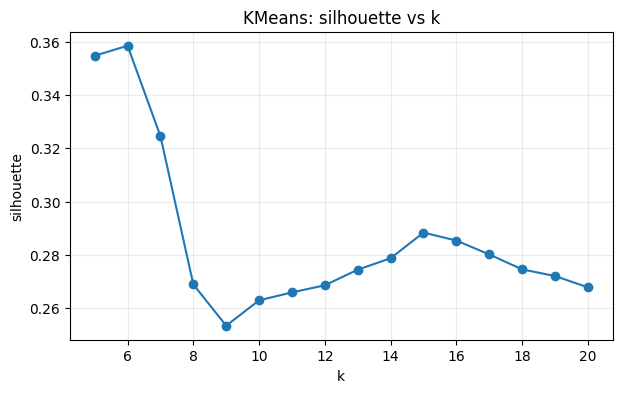

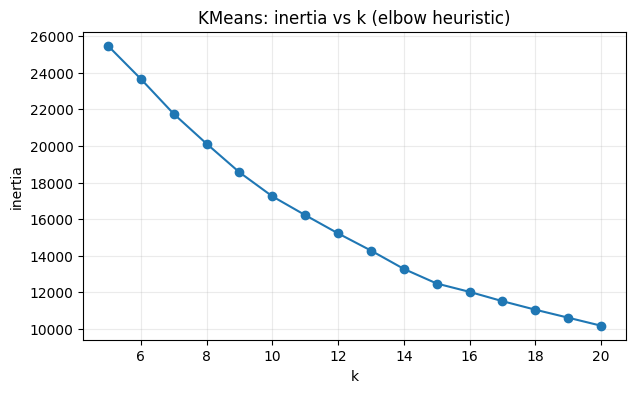

In [77]:
kmeans_ks = list(range(5, 21))
kmeans_results1 = eval_kmeans_grid(X1_processed, kmeans_ks)
eval_figures(kmeans_results1, 1)

### Второй датасет

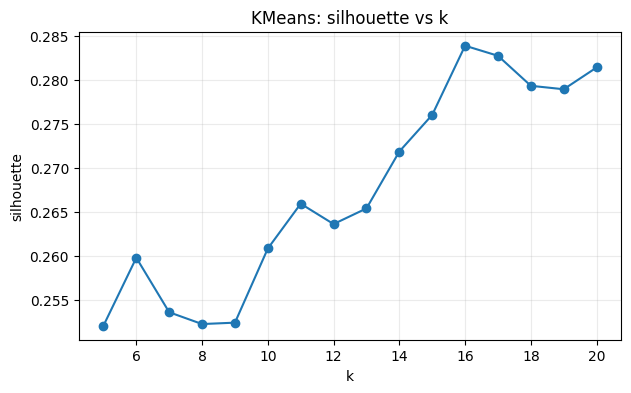

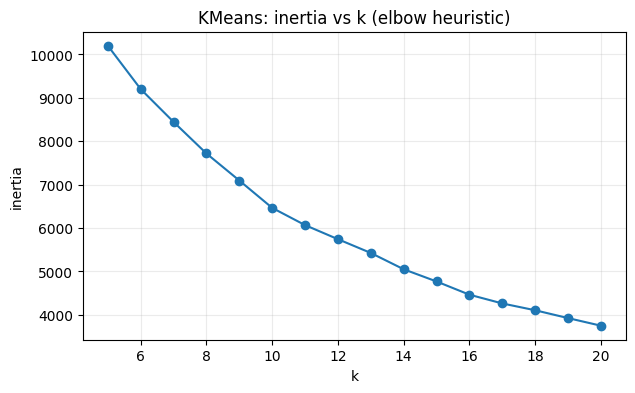

In [80]:
kmeans_results2 = eval_kmeans_grid(X2_processed, kmeans_ks)
eval_figures(kmeans_results2, 2)

### Третий датасет

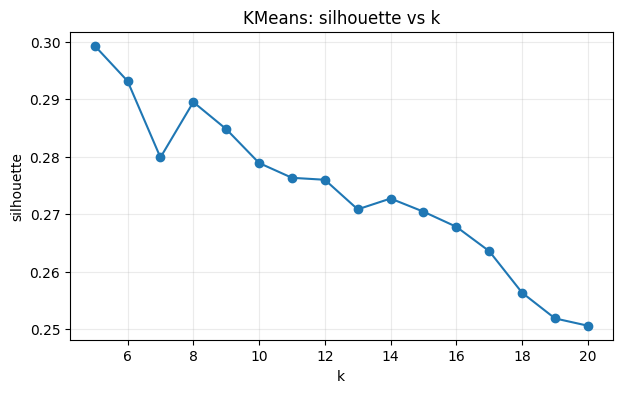

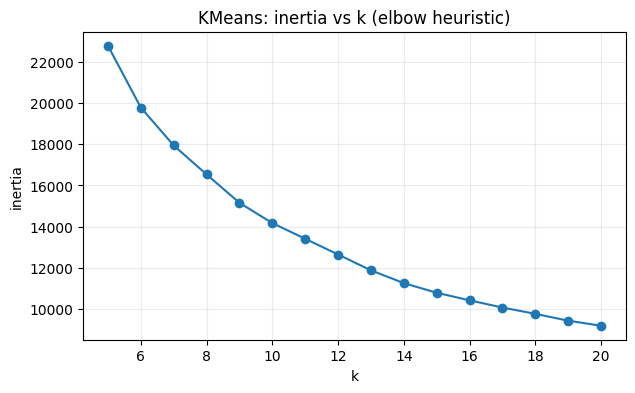

In [81]:
kmeans_results3 = eval_kmeans_grid(X3_processed, kmeans_ks)
eval_figures(kmeans_results3, 3)

### Четвёртый датасет

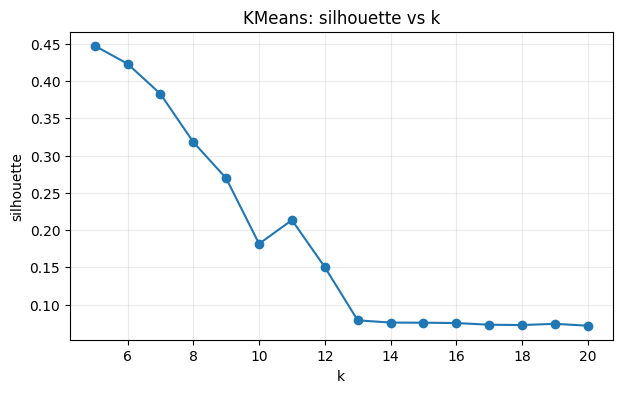

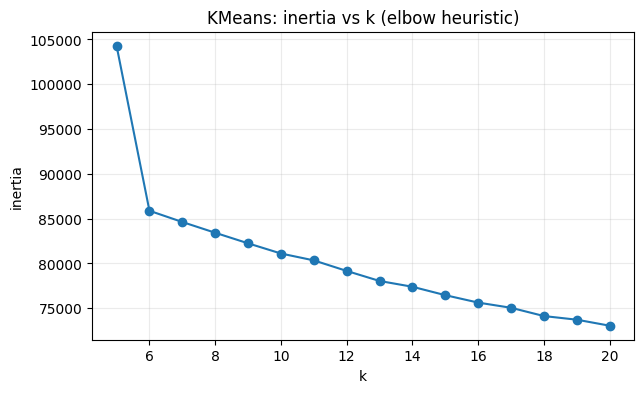

In [82]:
kmeans_results4 = eval_kmeans_grid(X4_processed, kmeans_ks)
eval_figures(kmeans_results4, 4)

## DBSCAN

In [49]:
def eval_dbscan_grid(X_feat, eps_list, min_samples_list):
    results = []
    n = len(X_feat)

    for eps in eps_list:
        for ms in min_samples_list:
            model = DBSCAN(eps=eps, min_samples=ms)
            labels = model.fit_predict(X_feat)

            noise_frac = float(np.mean(labels == -1))
            mask = labels != -1
            labels_nn = labels[mask]
            X_nn = X_feat[mask]

            if len(labels_nn) > 0:
                uniq = np.unique(labels_nn)
                mapping = {u: i for i, u in enumerate(uniq)}
                labels_nn = np.array([mapping[v] for v in labels_nn], dtype=int)

            metrics = None
            n_clusters = 0
            if len(X_nn) >= 10 and len(np.unique(labels_nn)) >= 2:
                metrics = safe_cluster_metrics(X_nn, labels_nn)
                n_clusters = len(np.unique(labels_nn))

            results.append({
                "algo": "dbscan",
                "params": {"eps": float(eps), "min_samples": int(ms)},
                "labels": labels,
                "metrics": metrics,
                "inertia": None,
                "n_clusters": int(n_clusters),
                "noise_frac": float(noise_frac),
                "n_non_noise": int(mask.sum()),
            })
    return results

def validation(dbscan_results):
    valid = [r for r in dbscan_results if r["metrics"] is not None and r["metrics"]["silhouette"] is not None]
    print("Valid DBSCAN configs:", len(valid))

    valid_sorted = sorted(valid, key=lambda r: r["metrics"]["silhouette"], reverse=True)
    for r in valid_sorted[:8]:
        print(r["params"], "sil=", round(r["metrics"]["silhouette"], 3), "noise=", round(r["noise_frac"], 3), "clusters=", r["n_clusters"])
    return valid_sorted


### Первый датасет

In [173]:
dbscan_eps = np.arange(0.2, 0.7, 0.1)
dbscan_min_samples = [3, 5, 10]
dbscan_results1 = eval_dbscan_grid(X1_processed, dbscan_eps, dbscan_min_samples)
valid_sorted1 = validation(dbscan_results1)

Valid DBSCAN configs: 15
{'eps': 0.6000000000000001, 'min_samples': 10} sil= 0.385 noise= 0.019 clusters= 5
{'eps': 0.6000000000000001, 'min_samples': 5} sil= 0.382 noise= 0.011 clusters= 5
{'eps': 0.6000000000000001, 'min_samples': 3} sil= 0.381 noise= 0.008 clusters= 5
{'eps': 0.5000000000000001, 'min_samples': 10} sil= 0.366 noise= 0.062 clusters= 6
{'eps': 0.5000000000000001, 'min_samples': 5} sil= 0.283 noise= 0.034 clusters= 9
{'eps': 0.5000000000000001, 'min_samples': 3} sil= 0.274 noise= 0.025 clusters= 10
{'eps': 0.2, 'min_samples': 10} sil= 0.194 noise= 0.96 clusters= 26
{'eps': 0.4000000000000001, 'min_samples': 10} sil= 0.19 noise= 0.21 clusters= 12


### Второй датасет

In [202]:
dbscan_eps2 = np.arange(0.15, 0.25, 0.02)
dbscan_results2 = eval_dbscan_grid(X2_processed, dbscan_eps2, dbscan_min_samples)
valid_sorted2 = validation(dbscan_results2)

Valid DBSCAN configs: 15
{'eps': 0.20999999999999996, 'min_samples': 10} sil= 0.097 noise= 0.136 clusters= 5
{'eps': 0.22999999999999995, 'min_samples': 10} sil= 0.06 noise= 0.115 clusters= 4
{'eps': 0.18999999999999997, 'min_samples': 10} sil= 0.041 noise= 0.163 clusters= 6
{'eps': 0.22999999999999995, 'min_samples': 5} sil= -0.034 noise= 0.087 clusters= 8
{'eps': 0.18999999999999997, 'min_samples': 5} sil= -0.051 noise= 0.11 clusters= 12
{'eps': 0.22999999999999995, 'min_samples': 3} sil= -0.066 noise= 0.08 clusters= 12
{'eps': 0.18999999999999997, 'min_samples': 3} sil= -0.102 noise= 0.092 clusters= 21
{'eps': 0.16999999999999998, 'min_samples': 10} sil= -0.13 noise= 0.205 clusters= 11


### Третий датасет

In [174]:
dbscan_eps3 = np.arange(0.4, 7, 0.7)
dbscan_results3 = eval_dbscan_grid(X3_processed, dbscan_eps3, dbscan_min_samples)
valid_sorted3 = validation(dbscan_results3)

Valid DBSCAN configs: 3
{'eps': 0.4, 'min_samples': 10} sil= 0.12 noise= 0.075 clusters= 4
{'eps': 0.4, 'min_samples': 5} sil= -0.04 noise= 0.05 clusters= 6
{'eps': 0.4, 'min_samples': 3} sil= -0.389 noise= 0.035 clusters= 31


### Четвёртый датасет

In [182]:
dbscan_eps4 = [1.5, 2.0, 2.5, 3.0, 3.5]
dbscan_results4 = eval_dbscan_grid(X4_processed, dbscan_eps4, dbscan_min_samples)
valid_sorted4 = validation(dbscan_results4)

Valid DBSCAN configs: 15
{'eps': 2.0, 'min_samples': 10} sil= 0.507 noise= 0.488 clusters= 6
{'eps': 3.5, 'min_samples': 3} sil= 0.447 noise= 0.0 clusters= 5
{'eps': 3.5, 'min_samples': 5} sil= 0.447 noise= 0.0 clusters= 5
{'eps': 3.5, 'min_samples': 10} sil= 0.447 noise= 0.0 clusters= 5
{'eps': 2.5, 'min_samples': 10} sil= 0.445 noise= 0.101 clusters= 6
{'eps': 2.5, 'min_samples': 5} sil= 0.442 noise= 0.088 clusters= 6
{'eps': 1.5, 'min_samples': 5} sil= 0.431 noise= 0.853 clusters= 22
{'eps': 3.0, 'min_samples': 10} sil= 0.426 noise= 0.009 clusters= 6


## AgglomerativeClustering

In [54]:
def eval_agglomerative_grid(X_feat, ks, linkages):
    results = []
    for linkage_name in linkages:
        for k in ks:
            try:
                model = AgglomerativeClustering(n_clusters=k, linkage=linkage_name)
                labels = model.fit_predict(X_feat)
            except Exception:
                continue

            metrics = safe_cluster_metrics(X_feat, labels)

            results.append({
                "algo": "agglomerative",
                "params": {"k": int(k), "linkage": linkage_name},
                "labels": labels,
                "metrics": metrics,
                "inertia": None,
                "n_clusters": len(np.unique(labels)),
                "noise_frac": 0.0,
            })
    return results

def eval_figure(agg_results, n):
    plt.figure(figsize=(7, 4))
    
    for linkage_name in agg_linkages:
        subset = [r for r in agg_results if r["params"]["linkage"] == linkage_name]
        subset = sorted(subset, key=lambda r: r["params"]["k"])
        ks = [r["params"]["k"] for r in subset]
        sil = [r["metrics"]["silhouette"] if r["metrics"] else None for r in subset]
        plt.plot(ks, sil, marker="o", label=linkage_name)
    
    plt.title("Agglomerative: silhouette vs k (by linkage)")
    plt.xlabel("k")
    plt.ylabel("silhouette")
    plt.grid(True, alpha=0.25)
    plt.legend()
    plt.savefig(f'artifacts/figures/agg_silhouette_dataset{n}.png', dpi = 300)
    plt.show()


### Первый датасет

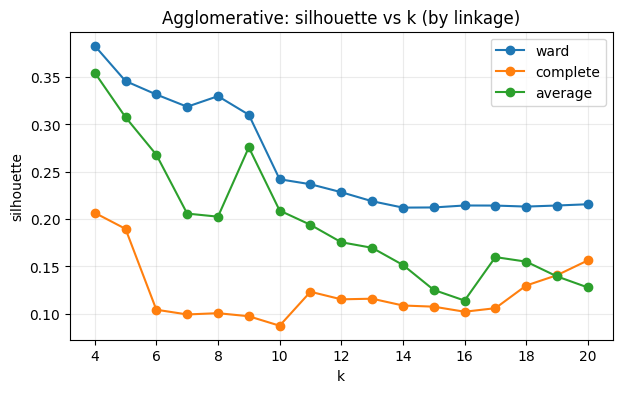

In [93]:
agg_ks = list(range(4, 21))
agg_linkages = ["ward", "complete", "average"]
agg_results1 = eval_agglomerative_grid(X1_processed, agg_ks, agg_linkages)
eval_figure(agg_results1, 1)

### Второй датасет

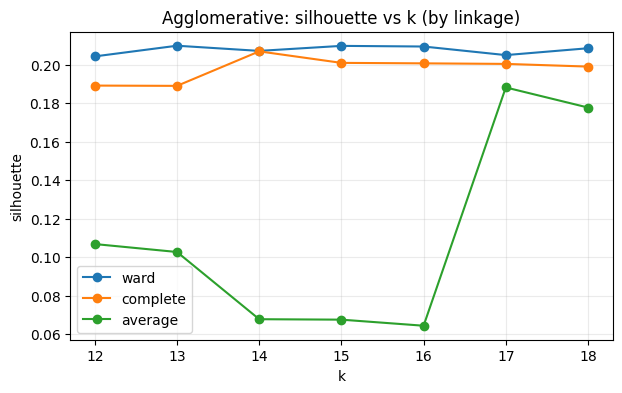

In [120]:
agg_results2 = eval_agglomerative_grid(X2_processed, list(range(12, 19)), agg_linkages)
eval_figure(agg_results2, 2)

### Третий датасет

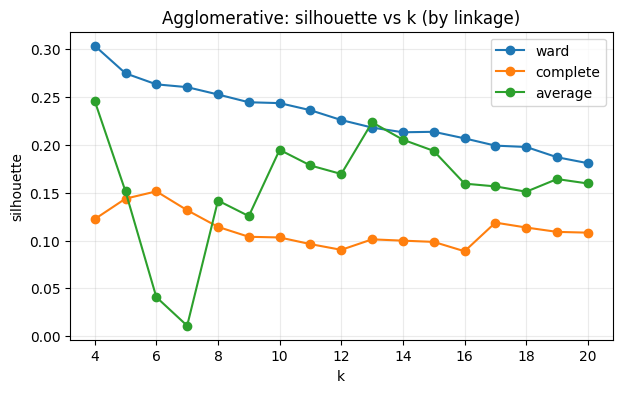

In [95]:
agg_results3 = eval_agglomerative_grid(X3_processed, agg_ks, agg_linkages)
eval_figure(agg_results3, 3)

### Четвёртый датасет

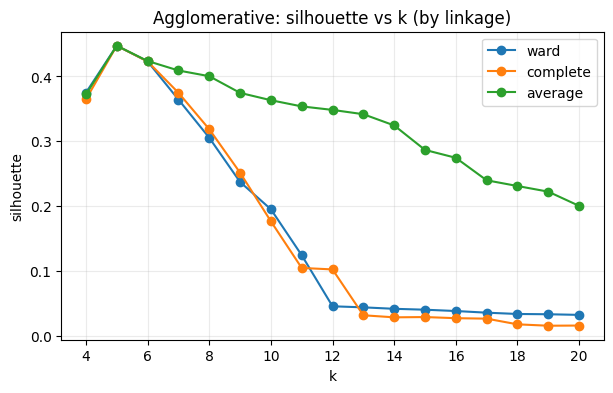

In [96]:
agg_results4 = eval_agglomerative_grid(X4_processed, agg_ks, agg_linkages)
eval_figure(agg_results4, 4)

# Метрики качества

## Подсчёт

In [97]:
def pick_best_by_silhouette(results):
    best = None
    best_score = -np.inf
    for r in results:
        m = r["metrics"]
        if m is None:
            continue
        s = m["silhouette"]
        if s is None:
            continue
        if s > best_score:
            best_score = s
            best = r
    return best, best_score

def print_result_card(name, result):
    m = result["metrics"] or {}
    print("=" * 72)
    print(f"{name}")
    print("algo:", result["algo"])
    print("params:", result["params"])
    print("n_clusters:", result.get("n_clusters"))
    if result["algo"] == "dbscan":
        print("noise_frac:", round(result.get("noise_frac", 0.0), 3), " non-noise:", result.get("n_non_noise"))
    print("metrics:")
    print("  silhouette:", None if m.get("silhouette") is None else round(m["silhouette"], 3))
    print("  davies_bouldin:", None if m.get("davies_bouldin") is None else round(m["davies_bouldin"], 3))
    print("  calinski_harabasz:", None if m.get("calinski_harabasz") is None else round(m["calinski_harabasz"], 1))
    if result.get("inertia") is not None:
        print("  inertia:", round(result["inertia"], 1))


### Первый датасет

In [175]:
best_kmeans1, best_kmeans_s1 = pick_best_by_silhouette(kmeans_results1)
best_kmeans1["params"], round(best_kmeans_s1, 3)

best_dbscan1 = valid_sorted1[0] if valid_sorted1 else None
best_dbscan1["params"] if best_dbscan1 else "No valid config found"

best_agg1, best_agg_s1 = pick_best_by_silhouette(agg_results1)
best_agg1["params"], round(best_agg_s1, 3)

print_result_card("BEST KMEANS (by silhouette)", best_kmeans1)
if best_dbscan1 is not None:
    print_result_card("BEST DBSCAN (by silhouette among valid)", best_dbscan1)
print_result_card("BEST AGGLOMERATIVE (by silhouette)", best_agg1)

BEST KMEANS (by silhouette)
algo: kmeans
params: {'k': 6}
n_clusters: 6
metrics:
  silhouette: 0.359
  davies_bouldin: 1.182
  calinski_harabasz: 7333.4
  inertia: 23662.2
BEST DBSCAN (by silhouette among valid)
algo: dbscan
params: {'eps': 0.6000000000000001, 'min_samples': 10}
n_clusters: 5
noise_frac: 0.019  non-noise: 11770
metrics:
  silhouette: 0.385
  davies_bouldin: 1.24
  calinski_harabasz: 8561.5
BEST AGGLOMERATIVE (by silhouette)
algo: agglomerative
params: {'k': 4, 'linkage': 'ward'}
n_clusters: 4
metrics:
  silhouette: 0.383
  davies_bouldin: 1.16
  calinski_harabasz: 9425.8


### Второй датасет

In [203]:
best_kmeans2, best_kmeans_s2 = pick_best_by_silhouette(kmeans_results2)
best_kmeans2["params"], round(best_kmeans_s2, 3)

best_dbscan2 = valid_sorted2[0] if valid_sorted2 else None
best_dbscan2["params"] if best_dbscan2 else "No valid config found"

best_agg2, best_agg_s2 = pick_best_by_silhouette(agg_results2)
best_agg2["params"], round(best_agg_s2, 3)

print_result_card("BEST KMEANS (by silhouette)", best_kmeans2)
if best_dbscan2 is not None:
    print_result_card("BEST DBSCAN (by silhouette among valid)", best_dbscan2)
print_result_card("BEST AGGLOMERATIVE (by silhouette)", best_agg2)

BEST KMEANS (by silhouette)
algo: kmeans
params: {'k': 16}
n_clusters: 16
metrics:
  silhouette: 0.284
  davies_bouldin: 0.956
  calinski_harabasz: 2329.4
  inertia: 4463.9
BEST DBSCAN (by silhouette among valid)
algo: dbscan
params: {'eps': 0.20999999999999996, 'min_samples': 10}
n_clusters: 5
noise_frac: 0.136  non-noise: 6914
metrics:
  silhouette: 0.097
  davies_bouldin: 0.962
  calinski_harabasz: 766.7
BEST AGGLOMERATIVE (by silhouette)
algo: agglomerative
params: {'k': 13, 'linkage': 'ward'}
n_clusters: 13
metrics:
  silhouette: 0.21
  davies_bouldin: 1.172
  calinski_harabasz: 1802.9


### Третий датасет

In [177]:
best_kmeans3, best_kmeans_s3 = pick_best_by_silhouette(kmeans_results3)
best_kmeans3["params"], round(best_kmeans_s3, 3)

best_dbscan3 = valid_sorted3[0] if valid_sorted3 else None
best_dbscan3["params"] if best_dbscan3 else "No valid config found"

best_agg3, best_agg_s3 = pick_best_by_silhouette(agg_results3)
best_agg3["params"], round(best_agg_s3, 3)

print_result_card("BEST KMEANS (by silhouette)", best_kmeans3)
if best_dbscan3 is not None:
    print_result_card("BEST DBSCAN (by silhouette among valid)", best_dbscan3)
print_result_card("BEST AGGLOMERATIVE (by silhouette)", best_agg3)

BEST KMEANS (by silhouette)
algo: kmeans
params: {'k': 5}
n_clusters: 5
metrics:
  silhouette: 0.299
  davies_bouldin: 1.169
  calinski_harabasz: 6125.1
  inertia: 22779.9
BEST DBSCAN (by silhouette among valid)
algo: dbscan
params: {'eps': 0.4, 'min_samples': 10}
n_clusters: 4
noise_frac: 0.075  non-noise: 13873
metrics:
  silhouette: 0.12
  davies_bouldin: 1.02
  calinski_harabasz: 2125.7
BEST AGGLOMERATIVE (by silhouette)
algo: agglomerative
params: {'k': 4, 'linkage': 'ward'}
n_clusters: 4
metrics:
  silhouette: 0.304
  davies_bouldin: 1.173
  calinski_harabasz: 6206.4


### Четвёртый датасет

In [183]:
best_kmeans4, best_kmeans_s4 = pick_best_by_silhouette(kmeans_results4)
best_kmeans4["params"], round(best_kmeans_s4, 3)

best_dbscan4 = valid_sorted4[0] if valid_sorted4 else None
best_dbscan4["params"] if best_dbscan4 else "No valid config found"

best_agg4, best_agg_s4 = pick_best_by_silhouette(agg_results4)
best_agg4["params"], round(best_agg_s4, 3)

print_result_card("BEST KMEANS (by silhouette)", best_kmeans4)
if best_dbscan4 is not None:
    print_result_card("BEST DBSCAN (by silhouette among valid)", best_dbscan4)
print_result_card("BEST AGGLOMERATIVE (by silhouette)", best_agg4)

BEST KMEANS (by silhouette)
algo: kmeans
params: {'k': 5}
n_clusters: 5
metrics:
  silhouette: 0.447
  davies_bouldin: 0.976
  calinski_harabasz: 5087.7
  inertia: 104300.6
BEST DBSCAN (by silhouette among valid)
algo: dbscan
params: {'eps': 2.0, 'min_samples': 10}
n_clusters: 6
noise_frac: 0.488  non-noise: 5115
metrics:
  silhouette: 0.507
  davies_bouldin: 0.824
  calinski_harabasz: 3916.5
BEST AGGLOMERATIVE (by silhouette)
algo: agglomerative
params: {'k': 5, 'linkage': 'ward'}
n_clusters: 5
metrics:
  silhouette: 0.447
  davies_bouldin: 0.976
  calinski_harabasz: 5087.7


# Визуализация

### Первый датасет

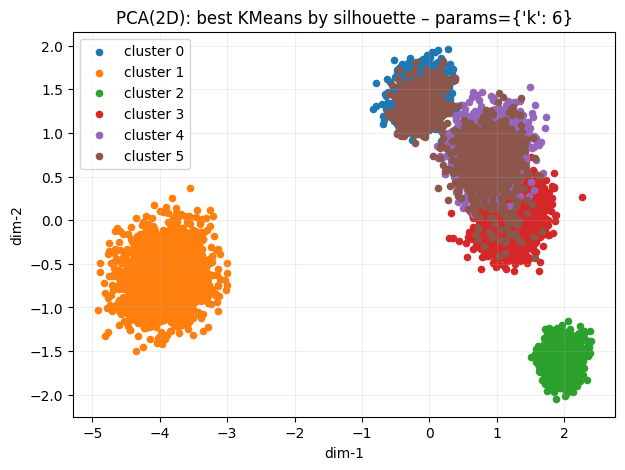

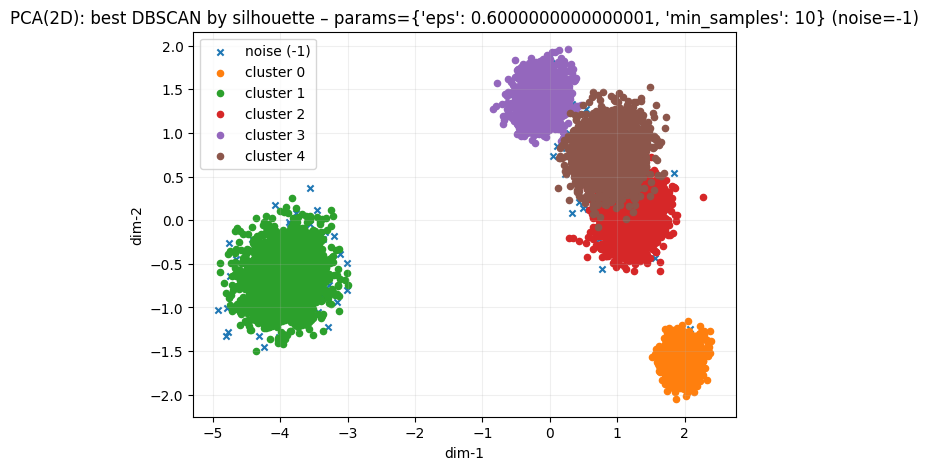

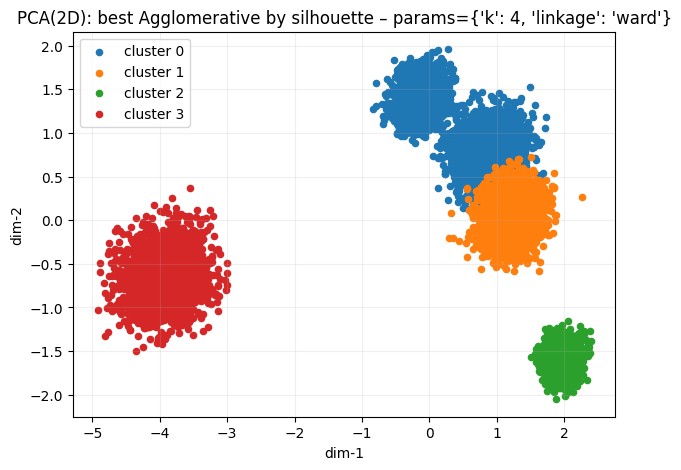

In [179]:
X1_plot2d = pca_2d_for_plot(X1_processed, random_state=RANDOM_STATE)

# KMeans best
plot_2d_embedding(
    X1_plot2d, best_kmeans1["labels"],
    title=f"PCA(2D): best KMeans by silhouette – params={best_kmeans1['params']}",
    name_algorithm = 'kmeans',
    n = 1,
)

# DBSCAN best (if exists)
if best_dbscan1 is not None:
    plot_2d_embedding(
        X1_plot2d, best_dbscan1["labels"],
        title=f"PCA(2D): best DBSCAN by silhouette – params={best_dbscan1['params']} (noise=-1)",
        name_algorithm = 'dbscan',
        n = 1,
    )

# Agglomerative best
plot_2d_embedding(
    X1_plot2d, best_agg1["labels"],
    title=f"PCA(2D): best Agglomerative by silhouette – params={best_agg1['params']}",
    name_algorithm = 'agg',
    n = 1,
)

### Второй датасет

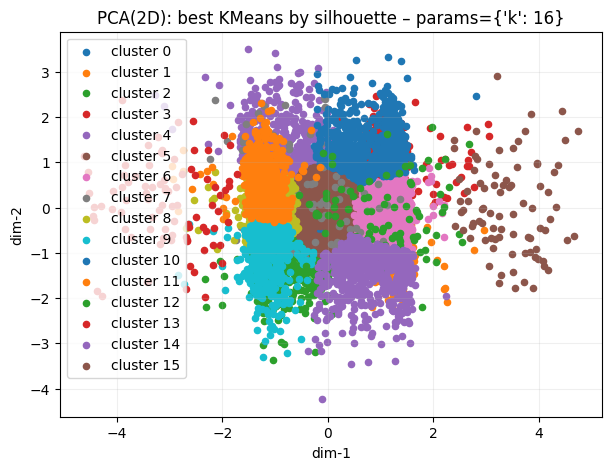

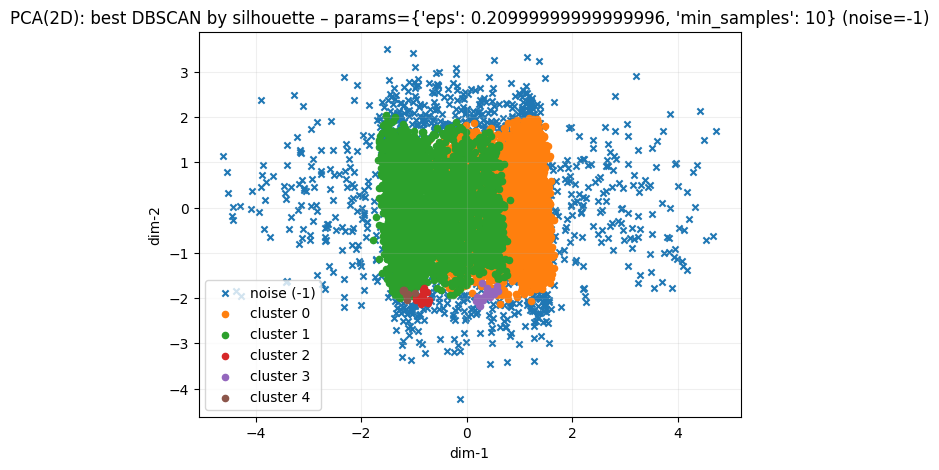

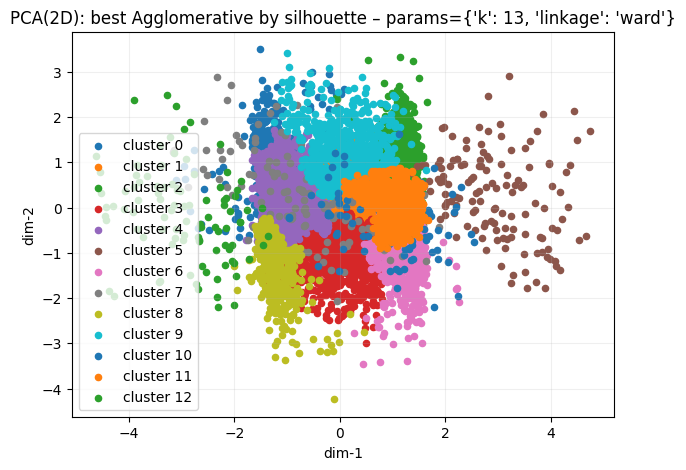

In [204]:
X2_plot2d = pca_2d_for_plot(X2_processed, random_state=RANDOM_STATE)

# KMeans best
plot_2d_embedding(
    X2_plot2d, best_kmeans2["labels"],
    title=f"PCA(2D): best KMeans by silhouette – params={best_kmeans2['params']}",
    name_algorithm = 'kmeans',
    n = 2,
)

# DBSCAN best (if exists)
if best_dbscan2 is not None:
    plot_2d_embedding(
        X2_plot2d, best_dbscan2["labels"],
        title=f"PCA(2D): best DBSCAN by silhouette – params={best_dbscan2['params']} (noise=-1)",
        name_algorithm = 'dbscan',
        n = 2,
    )

# Agglomerative best
plot_2d_embedding(
    X2_plot2d, best_agg2["labels"],
    title=f"PCA(2D): best Agglomerative by silhouette – params={best_agg2['params']}",
    name_algorithm = 'agg',
    n = 2,
)

### Третий датасет

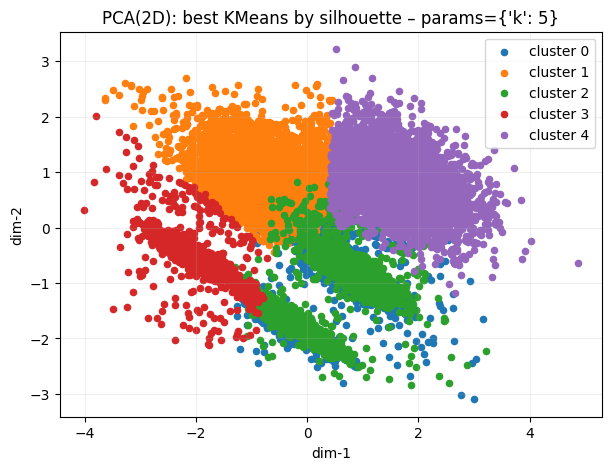

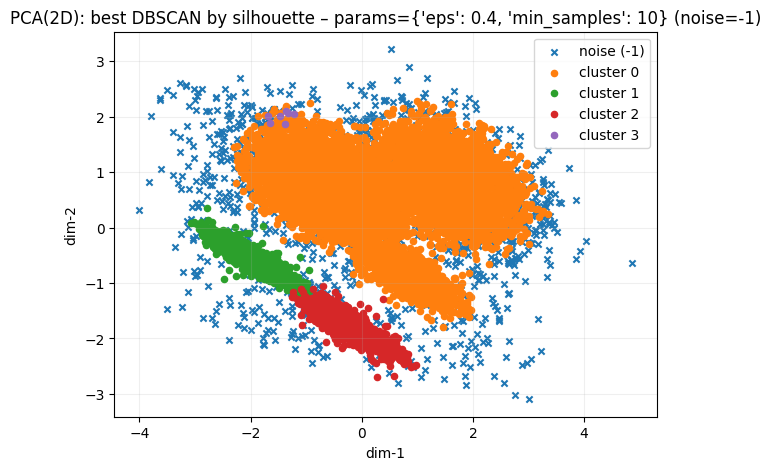

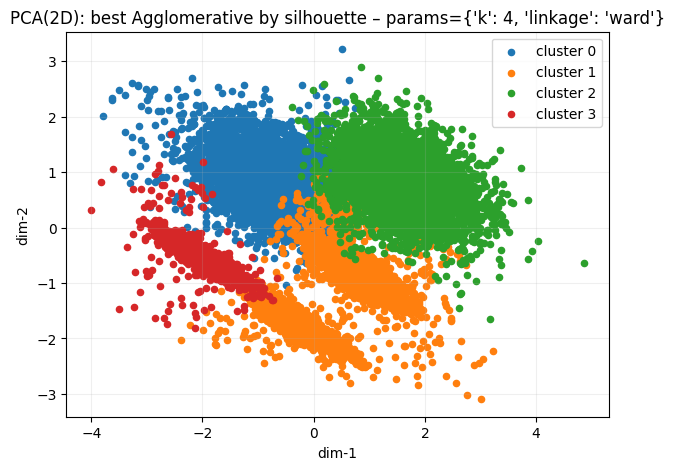

In [181]:
X3_plot2d = pca_2d_for_plot(X3_processed, random_state=RANDOM_STATE)

# KMeans best
plot_2d_embedding(
    X3_plot2d, best_kmeans3["labels"],
    title=f"PCA(2D): best KMeans by silhouette – params={best_kmeans3['params']}",
    name_algorithm = 'kmeans',
    n = 3,
)

# DBSCAN best (if exists)
if best_dbscan3 is not None:
    plot_2d_embedding(
        X3_plot2d, best_dbscan3["labels"],
        title=f"PCA(2D): best DBSCAN by silhouette – params={best_dbscan3['params']} (noise=-1)",
        name_algorithm = 'dbscan',
        n = 3,
    )

# Agglomerative best
plot_2d_embedding(
    X3_plot2d, best_agg3["labels"],
    title=f"PCA(2D): best Agglomerative by silhouette – params={best_agg3['params']}",
    name_algorithm = 'agg',
    n = 3,
)

### Четвёртый датасет

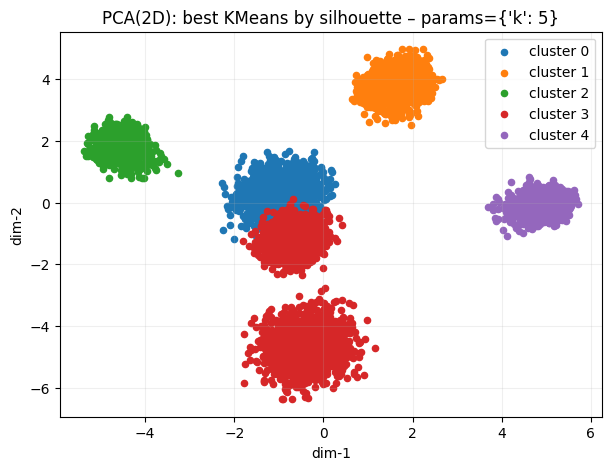

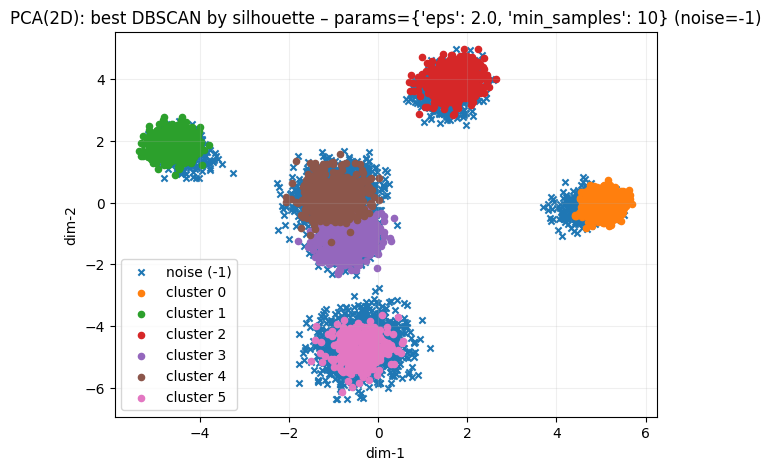

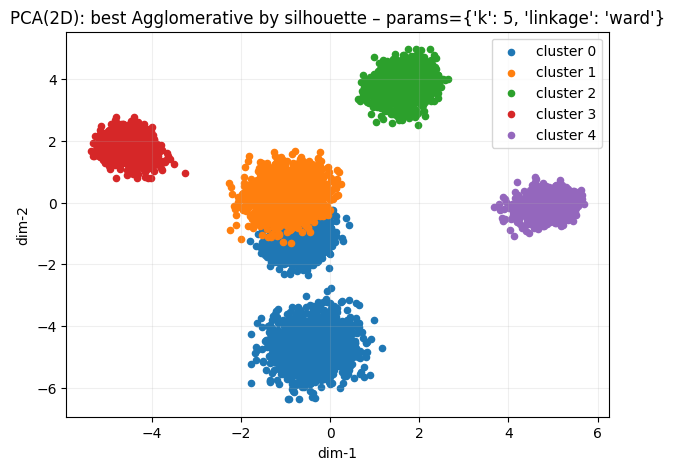

In [184]:
X4_plot2d = pca_2d_for_plot(X4_processed, random_state=RANDOM_STATE)

# KMeans best
plot_2d_embedding(
    X4_plot2d, best_kmeans4["labels"],
    title=f"PCA(2D): best KMeans by silhouette – params={best_kmeans4['params']}",
    name_algorithm = 'kmeans',
    n = 4,
)

# DBSCAN best (if exists)
if best_dbscan4 is not None:
    plot_2d_embedding(
        X4_plot2d, best_dbscan4["labels"],
        title=f"PCA(2D): best DBSCAN by silhouette – params={best_dbscan4['params']} (noise=-1)",
        name_algorithm = 'dbscan',
        n = 4,
    )

# Agglomerative best
plot_2d_embedding(
    X4_plot2d, best_agg4["labels"],
    title=f"PCA(2D): best Agglomerative by silhouette – params={best_agg4['params']}",
    name_algorithm = 'agg',
    n = 4,
)

# Устойчивость

### Первый датасет

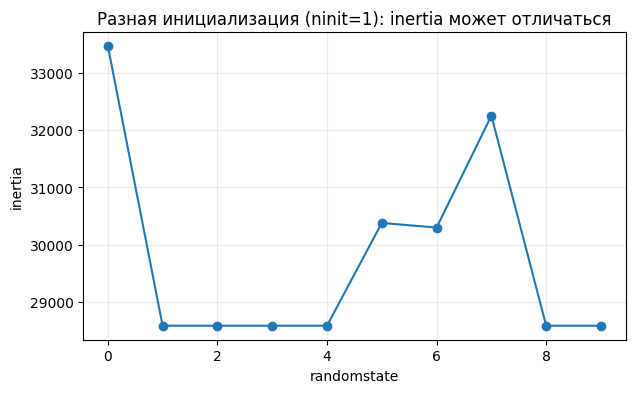

min inertia: 28591.33
max inertia: 33466.85


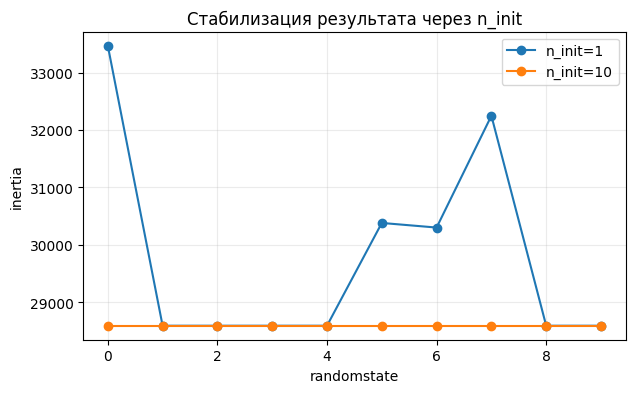

Средний попарный ARI: 1.000
Средний попарный NMI: 1.000


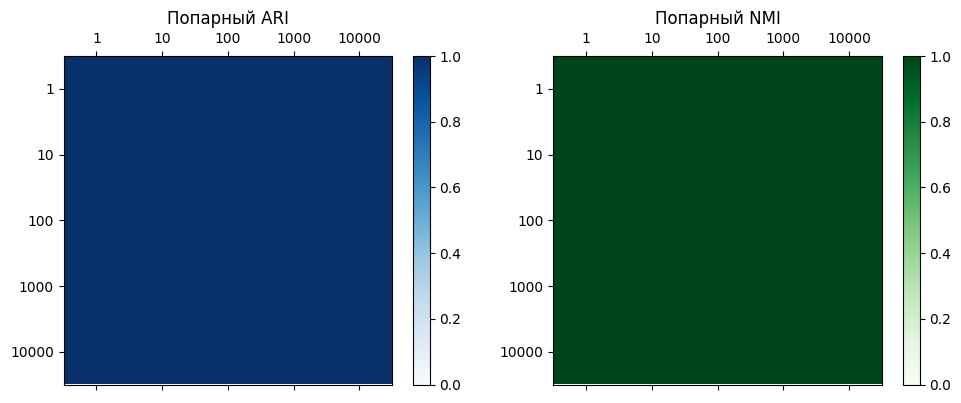

In [72]:
inertias = []
states = list(range(10))

for rs in states:
    m = KMeans(n_clusters=4, n_init=1, random_state=rs)
    m.fit(X1_processed)
    inertias.append(m.inertia_)

plt.figure(figsize=(7, 4))
plt.plot(states, inertias, marker="o")
plt.title("Разная инициализация (ninit=1): inertia может отличаться")
plt.xlabel("randomstate")
plt.ylabel("inertia")
plt.grid(True, alpha=0.25)
plt.savefig(f"artifacts/figures/stability_before_dataset1.png", dpi=300)
plt.show()

print("min inertia:", round(float(np.min(inertias)), 2))
print("max inertia:", round(float(np.max(inertias)), 2))
 
inertias_1 = []
inertias_10 = []

for rs in states:
    m1 = KMeans(n_clusters=4, n_init=1, random_state=rs)
    m1.fit(X1_processed)
    inertias_1.append(m1.inertia_)

    m10 = KMeans(n_clusters=4, n_init=10, random_state=rs)
    m10.fit(X1_processed)
    inertias_10.append(m10.inertia_)

plt.figure(figsize=(7, 4))
plt.plot(states, inertias_1, marker="o", label="n_init=1")
plt.plot(states, inertias_10, marker="o", label="n_init=10")
plt.title("Стабилизация результата через n_init")
plt.xlabel("randomstate")
plt.ylabel("inertia")
plt.grid(True, alpha=0.25)
plt.legend()
plt.savefig(f"artifacts/figures/stability_after_dataset1.png", dpi=300)
plt.show()

labels_list = []
RANDOM_STATES = [1, 10, 100, 1000, 10000]
for rs in RANDOM_STATES:
    kmeans = KMeans(n_clusters=4, n_init=10, random_state=rs)
    labels = kmeans.fit_predict(X1_processed)
    labels_list.append(labels)

# Теперь берём попарные ARI и NMI
ari_matrix = np.zeros((len(RANDOM_STATES), len(RANDOM_STATES)))
nmi_matrix = np.zeros((len(RANDOM_STATES), len(RANDOM_STATES)))

for i in range(len(labels_list)):
    for j in range(len(labels_list)):
        if i == j:
            ari_matrix[i, j] = 1.0
            nmi_matrix[i, j] = 1.0
        else:
            ari_matrix[i, j] = adjusted_rand_score(labels_list[i], labels_list[j])
            nmi_matrix[i, j] = normalized_mutual_info_score(labels_list[i], labels_list[j])


def mean_off_diagonal(mat):
    mask = ~np.eye(mat.shape[0], dtype=bool)
    return np.mean(mat[mask])

mean_ari = mean_off_diagonal(ari_matrix)
mean_nmi = mean_off_diagonal(nmi_matrix)

print(f"Средний попарный ARI: {mean_ari:.3f}")
print(f"Средний попарный NMI: {mean_nmi:.3f}")

# Опционально: визуализация матриц
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
im1 = axes[0].matshow(ari_matrix, vmin=0, vmax=1, cmap='Blues')
axes[0].set_title("Попарный ARI")
plt.colorbar(im1, ax=axes[0])

im2 = axes[1].matshow(nmi_matrix, vmin=0, vmax=1, cmap='Greens')
axes[1].set_title("Попарный NMI")
plt.colorbar(im2, ax=axes[1])

for ax in axes:
    ax.set_xticks(range(len(RANDOM_STATES)))
    ax.set_yticks(range(len(RANDOM_STATES)))
    ax.set_xticklabels(RANDOM_STATES)
    ax.set_yticklabels(RANDOM_STATES)

plt.tight_layout()
plt.savefig("artifacts/figures/stability_ari_nmi_dataset1.png", dpi=300)
plt.show()


# Итоги по датасетам

## Первый датасет

Лучший метод для первого датасета - **DBSCAN** ('eps': 0.6, 'min_samples': 10)

Несмотря на наличие шумовых признаков и разные масштабы переменных, после корректного препроцессинга данные приобрели чёткую структуру. Подобранные параметры DBSCAN позволили выявить плотные, компактные кластеры без избыточной маркировки точек как выбросов. Визуализация в PCA-пространстве подтвердила высокую согласованность полученных групп. В отличие от KMeans, DBSCAN не предполагает сферическую форму кластеров, что сделало его более адекватным выбором для данной структуры данных.

BEST DBSCAN (by silhouette among valid)
- algo: dbscan
- params: {'eps': 0.6000000000000001, 'min_samples': 10}
- n_clusters: 5
- noise_frac: 0.019  non-noise: 11770
- metrics:
  - silhouette: 0.385
  - davies_bouldin: 1.24
  - calinski_harabasz: 8561.5

## Второй датасет

Лучший метод для второго датасета - **KMeans** ('k': 16)

Данные содержат нелинейную структуру, фоновый шум и явный шумовой признак, что усложняет кластеризацию. DBSCAN оказался слишком чувствителен к выбросам, а Agglomerative — менее стабильным при высокой гранулярности. KMeans, несмотря на свои ограничения, продемонстрировал наивысший silhouette_score и обеспечил воспроизводимое покрытие почти всех объектов. Увеличение числа кластеров до 16 позволило аппроксимировать сложную форму распределения через множество мелких, но компактных групп.

BEST KMEANS (by silhouette)
- algo: kmeans
- params: {'k': 16}
- n_clusters: 16
- metrics:
  - silhouette: 0.284
  - davies_bouldin: 0.956
  - calinski_harabasz: 2329.4
  - inertia: 4463.9

## Третий датасет

Лучший метод для третьего датасета - **AgglomerativeClustering** ('k': 4, 'linkage': 'ward')

Кластеры в этом датасете различаются по плотности и окружены фоновым шумом, что затрудняет применение методов, основанных на равномерной дисперсии (например, KMeans). Хотя KMeans показал сопоставимый silhouette_score, Agglomerative с ward оказался предпочтительнее, потому что он детерминирован, не зависит от случайной инициализации и минимизирует внутрикластерную дисперсию. Это особенно важно при наличии шума и небольших вариаций плотности. В результате полученное разбиение оказалось более устойчивым и интерпретируемым.

BEST AGGLOMERATIVE (by silhouette)
- algo: agglomerative
- params: {'k': 4, 'linkage': 'ward'}
- n_clusters: 4
- metrics:
  - silhouette: 0.304
  - davies_bouldin: 1.173
  - calinski_harabasz: 6206.4

## Четвёртый датасет

Лучший метод для четвёртого датасета - **DBSCAN** ('eps': 2.0, 'min_samples': 10)

Этот датасет отличается высокой размерностью, наличием категориальных признаков и пропусков в числовых переменных. После тщательного препроцессинга (SimpleImputer + OneHotEncoder + StandardScaler) признаки стали пригодными для анализа. DBSCAN с увеличенным eps = 2.0 успешно выделил осмысленные плотностные группы, избегая как избыточного объединения, так и фрагментации. Метод оказался особенно уместен, поскольку не требует задания числа кластеров и не навязывает жёсткую структуру, что критично в условиях высокой размерности и смешанного типа признаков.

BEST DBSCAN (by silhouette among valid)
- algo: dbscan
- params: {'eps': 2.0, 'min_samples': 10}
- n_clusters: 6
- noise_frac: 0.488  non-noise: 5115
- metrics:
  - silhouette: 0.507
  - davies_bouldin: 0.824
  - calinski_harabasz: 3916.5

# Артефакты экспериментов

Вспомогательная функция сохранения

In [214]:
def save_json(obj: dict, path: Path):
    path.parent.mkdir(parents=True, exist_ok=True)
    with path.open("w", encoding="utf-8") as f:
        json.dump(obj, f, ensure_ascii=False, indent=2)

In [222]:
metrics_summary = {
    "S07-hw-dataset-01": {
        "algo": {
            "Kmeans": {
                "params": 6,
                "n_clusters:": 6,
                "metrics": {
                    "silhouette_score": 0.359,
                    "davies_bouldin_score": 1.182,
                    "calinski_harabasz_score": 7333.4,
                    "inertia": 23662.2
                }
            },
            "DBSCAN": {
                "params": {
                    "eps": 0.6,
                    "min_samples": 10,
                },
                "n_clusters:": 5,
                "noise_frac": 0.019,
                "non-noise": 11770,
                "metrics": {
                    "silhouette_score": 0.385,
                    "davies_bouldin_score": 1.24,
                    "calinski_harabasz_score": 8561.5,
                }
            },
             "Agglomerative": {
                "params": {
                    "k": 4,
                    "linkage": "ward",
                },
                "n_clusters:": 4,
                "metrics": {
                    "silhouette_score": 0.383,
                    "davies_bouldin_score": 1.16,
                    "calinski_harabasz_score": 9425.8,
                }
             }
        }
    },
    "S07-hw-dataset-02": {
       "algo": {
            "Kmeans": {
                "params": 16,
                "n_clusters:": 16,
                "metrics": {
                    "silhouette_score": 0.284,
                    "davies_bouldin_score": 0.956,
                    "calinski_harabasz_score": 2329.4,
                    "inertia": 4463.9
                }
            },
            "DBSCAN": {
                "params": {
                    "eps": 0.21,
                    "min_samples": 10,
                },
                "n_clusters:": 5,
                "noise_frac": 0.136,
                "non-noise": 6914,
                "metrics": {
                    "silhouette_score": 0.097,
                    "davies_bouldin_score": 0.962,
                    "calinski_harabasz_score": 766.7,
                }
            },
             "Agglomerative": {
                "params": {
                    "k": 13,
                    "linkage": "ward",
                },
                "n_clusters:": 13,
                "metrics": {
                    "silhouette_score": 0.21,
                    "davies_bouldin_score": 1.172,
                    "calinski_harabasz_score": 1802.9,
                }
             }
        } 
    },
    "S07-hw-dataset-03": {
        "algo": {
            "Kmeans": {
                "params": 5,
                "n_clusters:": 5,
                "metrics": {
                    "silhouette_score": 0.299,
                    "davies_bouldin_score": 1.169,
                    "calinski_harabasz_score": 6125.1,
                    "inertia": 22779.9
                }
            },
            "DBSCAN": {
                "params": {
                    "eps": 0.4,
                    "min_samples": 10,
                },
                "n_clusters:": 4,
                "noise_frac": 0.075,
                "non-noise": 13871,
                "metrics": {
                    "silhouette_score": 0.12,
                    "davies_bouldin_score": 1.02,
                    "calinski_harabasz_score": 2125.7,
                }
            },
             "Agglomerative": {
                "params": {
                    "k": 4,
                    "linkage": "ward",
                },
                "n_clusters:": 4,
                "metrics": {
                    "silhouette_score": 0.304,
                    "davies_bouldin_score": 1.173,
                    "calinski_harabasz_score": 6206.4,
                }
             }
        }
    },
    "S07-hw-dataset-04": {
         "algo": {
            "Kmeans": {
                "params": 5,
                "n_clusters:": 5,
                "metrics": {
                    "silhouette_score": 0.447,
                    "davies_bouldin_score": 0.976,
                    "calinski_harabasz_score": 5087.7,
                    "inertia": 104300.6
                }
            },
            "DBSCAN": {
                "params": {
                    "eps": 2.0,
                    "min_samples": 10,
                },
                "n_clusters:": 6,
                "noise_frac": 0.488,
                "non-noise": 5115,
                "metrics": {
                    "silhouette_score": 0.507,
                    "davies_bouldin_score": 0.824,
                    "calinski_harabasz_score": 3916.5,
                }
            },
             "Agglomerative": {
                "params": {
                    "k": 5,
                    "linkage": "ward",
                },
                "n_clusters:": 5,
                "metrics": {
                    "silhouette_score": 0.447,
                    "davies_bouldin_score": 0.976,
                    "calinski_harabasz_score": 5087.7,
                }
             }
        }
    },
    "random_state": RANDOM_STATE,
}

best_configs = {
    "S07-hw-dataset-01": {
        "DBSCAN": {
                "params": {
                    "eps": 0.6,
                    "min_samples": 10,
                },
            },
    },
    "S07-hw-dataset-02": {
            "Kmeans": {
                "k": 16,
            },
    },
    "S07-hw-dataset-03": {
        "Agglomerative": {
                "params": {
                    "k": 4,
                    "linkage": "ward",
                },
             }
    },
    "S07-hw-dataset-04": {
        "DBSCAN": {
                "params": {
                    "eps": 2.0,
                    "min_samples": 10,
                },
            },
    },
    "random_state": RANDOM_STATE,
}

save_json(metrics_summary, ARTIFACTS_DIR / "metrics_summary.json")
save_json(best_configs, ARTIFACTS_DIR / "best_configs.json")

print("Saved:", ARTIFACTS_DIR / "metrics_summary.json")
print("Saved:", ARTIFACTS_DIR / "best_configs.json")


Saved: artifacts\metrics_summary.json
Saved: artifacts\best_configs.json
